# Curso de Big Data. Otoño 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo 24 de marzo a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: v.oubina@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [7]:
import requests 
# la búsqueda en el navegador es la siguiente:  
# https://listado.mercadolibre.com.ar/bicicleta#D[A:bicicleta]
# Como usamos la API seguimos este formato:
# https://api.mercadolibre.com/sites/$MLA/search?q=bicicleta%20item
# Recordamos que
# $SITE_ID: MLA  # MLA es el sitio de Argentina
# item: item a buscar. (reemplazamos los espacios con %20)

buscar = "bicileta"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

# Vemos el texto
response.text

<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"bicileta","paging":{"total":19882,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA1147844417","title":"Bicicleta Silverfox R29 21v Mtb Aluminio 29 Freno Disco Susp Color Naranja Tamaño Del Cuadro 18","condition":"new","thumbnail_id":"659217-MLU73459629072_122023","catalog_product_id":"MLA23755521","listing_type_id":"gold_special","permalink":"https://www.mercadolibre.com.ar/bicicleta-silverfox-r29-21v-mtb-aluminio-29-freno-disco-susp-color-naranja-tamano-del-cuadro-18/p/MLA23755521","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA6143","domain_id":"MLA-BICYCLES","thumbnail":"http://http2.mlstatic.com/D_659217-MLU73459629072_122023-I.jpg","currency_id":"ARS","order_backend":1,"price":258099.11,"original_price":289999,"sale_price":null,"available_quantity":50,"official_store_id":null,"use_thumbnail_id":true,"accepts_mercadopago":true,"shipping":{"store_pick_up":false,"free_shipping":true,"l

In [3]:
url

'https://api.mercadolibre.com/sites/MLA/search?q=bicileta'

In [4]:
#Guardamos el resultado en un diccionario (json)
data = response.json()
#type(data) # dict
data

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'bicileta',
 'paging': {'total': 19971, 'primary_results': 1000, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1147844417',
   'title': 'Bicicleta Silverfox R29 21v Mtb Aluminio 29 Freno Disco Susp Color Naranja Tamaño Del Cuadro 18',
   'condition': 'new',
   'thumbnail_id': '659217-MLU73459629072_122023',
   'catalog_product_id': 'MLA23755521',
   'listing_type_id': 'gold_special',
   'permalink': 'https://www.mercadolibre.com.ar/bicicleta-silverfox-r29-21v-mtb-aluminio-29-freno-disco-susp-color-naranja-tamano-del-cuadro-18/p/MLA23755521',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA6143',
   'domain_id': 'MLA-BICYCLES',
   'thumbnail': 'http://http2.mlstatic.com/D_659217-MLU73459629072_122023-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 258099.11,
   'original_price': 289999,
   'sale_price': None,
   'available_quantity': 50,
   'official_store_id': Non

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [10]:
import pandas as pd


In [11]:
import sys
!{sys.executable} -m pip install pandas

In [54]:
# primero creamos una lista para guardar los precios de los ítems.
precios = []
# puscamos en los resultados para extraer los precios
for item in data['results']:
    precios.append(item['price'])
# ahora creamos un dataFrame con los precios
df_precios = pd.DataFrame(precios, columns=['Precio'])

# definimos nuestras variables que calculan el precio promedio, mínimo y máximo y luego imprimos los resultados.
precio_promedio = df_precios['precio'].mean()
precio_minimo = df_precios['precio'].min()
precio_maximo = df_precios['precio'].max()

print("precio promedio:", precio_promedio)
print("el mínimo:", precio_minimo)
print("el máximo:", precio_maximo)

KeyError: 'precio'

#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

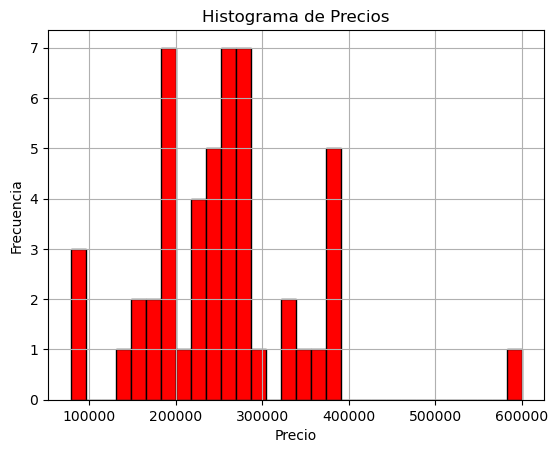

In [24]:
#imprtamos matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# creamos el histograma de los precios (usamoss la libreria de Pandas)
df_precios.hist(bins=30, color="red", edgecolor='black')

plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

plt.show()


#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [61]:
import requests 
#vamos a buscar los productos para la categoria "celulares y smartphones" 
#Al usar la API tenemos que seguir este formato:
# https://api.mercadolibre.com/sites/$SITE_ID/search?seller_id=$SELLER_ID
url = "https://api.mercadolibre.com/users/$USER_ID/items/search".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) 

# Vemos el texto
response.text



<Response [403]>


'{"message":"The caller is not authorized to access this resource","error":"forbidden","status":403,"cause":[]}'

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [31]:

import requests #html requestor
from bs4 import BeautifulSoup #html parser
import pandas as pd #dataframe manipulator 



In [28]:
url = "https://www.lanacion.com.ar/"

r = requests.get(url) #traigo el contenido del html
contenido = r.content

soup = BeautifulSoup(contenido, "html.parser")
soup

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes" name="viewport"/><meta content="#ffffff" name="theme-color"/><title>Últimas noticias de Argentina y el mundo - LA NACION</title><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/juan-bautista-tata-yofre-en-el-video-del-24-de-FS3FNHSVCNEC7AKGAB4F7FF4E4.JPG?auth=1f26662737a25ad239b0a10f4ea112186aa1b3d18111be2bcc8c7fc8208bb9c0&amp;width=488&amp;height=325&amp;quality=70&amp;smart=true" media="(min-width: 768px)" rel="preload"/><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/juan-bautista-tata-yofre-en-el-video-del-24-de-FS3FNHSVCNEC7AKGAB4F7FF4E4.JPG?auth=1f26662737a25ad239b0a10f4ea112186aa1b3d18111be2bcc8c7fc8208bb9c0&amp;width=420&amp;height=280&amp;quality=70&amp;smart=true" media="(max-width: 767px)" rel="preload"/><style>
@font-face {font-family:'Prumo

In [56]:
#comenzamos utilizando beautiful soup para encontrar el elemento'<main>', que tiene la clase 'main-container' en la variable soup.
portada= soup.find('main', class_='main-container')
#luego lo que realizamos, es que buscamos todos los elemntos '<a>', dentro del  elemento'<main>' y los almacenamos en esta variable.
a_href_values = portada.find_all('a')
#imprimimos las listas
print('\n', a_href_values)
print(type(a_href_values))
#iniciamos una lista vacia
f_values=[]
#iniciamos a recorer la lista que recorre todos los elementos '<a>' y obtiene el valor 'href' de cada uno almacenandolos en la lista 'links'
#iniciamos un loop que itera sobre cada elemento de 'a_href_values'
links = [link.get('href')]
for link in a_href_values:
#verificamos si el guión está presente en el valor actual del elemento '<a>', filtrando los enlaces que contienen un guión. Si el guión está presente, se agrega a la lista 'f_values'
    if "-" in value:
         f_values.append(f"https://www.lanacion.com.ar/{value}")




 [<a class="link notes" href="/politica/javier-milei-en-vivo-las-ultimas-medidas-del-gobierno-nid24032024/" target="_self" title="Movilizaciones por el 24 de marzo"><h4 class="text ln-text --prumo --font-black --font-m">Movilizaciones por el 24 de marzo</h4><span class="text ln-text time-since --font-regular --font-xs">Hace 15 min</span></a>, <a class="link ln-link flex flex-column --unstyled" href="/politica/el-gobierno-publico-un-spot-con-su-vision-sobre-el-24-de-marzo-nid24032024/" target="_self" title='"Memoria completa". El Gobierno publicó un spot con su versión sobre el 24 de marzo'><section class="media-container" href="/politica/el-gobierno-publico-un-spot-con-su-vision-sobre-el-24-de-marzo-nid24032024/" title="El Gobierno publicó un spot con su versión sobre el 24 de marzo"><picture class="ln-placeholder flex jc-center ai-center relative ratio-3-2"><source media="(min-width: 768px)" srcset="https://www.lanacion.com.ar/resizer/v2/juan-bautista-tata-yofre-en-el-video-del-24-de

NameError: name 'link' is not defined

In [49]:
#guardamos en un dataframe
link_df = pd.DataFrame(f_values)

In [52]:
#exportamos a un excel
link_df.to_excel('links.xlsx',index=False)